# Nearest Neighbor Classification on Real Data

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# import os
# os.system('jupyter nbconvert --to html nearest-neighbor-cross-commented.ipynb')

## Exploring the Data

In [316]:
# Load the digit dataset
from sklearn.datasets import load_digits

digits = load_digits()

print("The digits-dict has following keys:\n{}".format(digits.keys()))

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print("\ndata has following data structure: {0}\ndata has a shape of {1} (number of images, 1D-size)\n".format(data.dtype, data.shape))
print("There are {2} images which have following shape {0}x{1}.".format(images.shape[1], images.shape[2], images.shape[0]))

The digits-dict has following keys:
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

data has following data structure: float64
data has a shape of (1797, 64) (number of images, 1D-size)

There are 1797 images which have following shape 8x8.


<span style="color:green;font-weight:bold"> Your code is essentially equal to the code provided in the sample solution. You used the formatting of a string in order to fill the places in your text with variables, which results in a much cleaner output than in the sample solution. Also, it is better readable. </span>

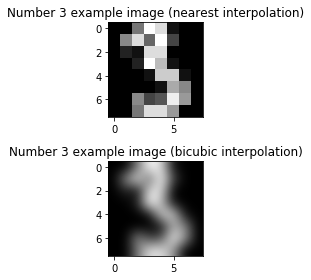

nearest interpolation-method is blocky and the bicubic method is smoother.


In [317]:
img = images[target==3,:,:][0]

assert 2 == len(img.shape)

plt.figure()
plt.gray()


plt.subplot(211)
plt.title("Number 3 example image (nearest interpolation)")
plt.imshow(img, interpolation="nearest")

plt.subplot(212)
plt.title("Number 3 example image (bicubic interpolation)")
plt.imshow(img, interpolation="bicubic")

plt.tight_layout()
plt.show()

print("nearest interpolation-method is blocky and the bicubic method is smoother.")

<span style="color:green;font-weight:bold"> Your code is essentially equal to the code provided in the sample solution. But instead of just counting the ith element from the target vector, you chose to slice the first image out of all images containing the target==3, which is better readable and more intuitive. The presentation of the images could be nicer when plotting them next to each other instead of over each other. Also, the axes could be ommitted, since they do not provode any usable information. The title of the figures could be better, since they are quite long. </span>

In [318]:
# Split the data into test and train samples
from sklearn import model_selection
X_all = data
Y_all = target
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)

<span style="color:green;font-weight:bold"> Your code is essentially equal to the code provided in the sample solution. </span>

## Distance function computation using loops

In [319]:
# distance function using loops
def dist_loop(training: np.array, test: np.array) -> np.array:
    """
        Computes naivly the euclidean distance between each test-vector to each train-vector
        and returns a distance matrix.
        
        params
        ______
        training : np.array
            NxD matrix, which contains every flattened training image.
        test : np.array
            MxD matrix, which contains every flattened test image.
            
        returns
        _______
        dist_mat : np.array
            NxM matrix, where dist_mat(i,j) is the euclidean distance between training[i,:] 
            and test[j,:].
    """
    
    assert len(training.shape) == 2, "training-array should be of dim. 2"
    assert len(test.shape) == 2, "test-array should be of dim. 2"
    assert training.shape[1] == test.shape[1], "the training images should have the same Dim. than the test images"
    
    N, M = training.shape[0], test.shape[0]
    
    dist_mat = np.zeros((N, M))
    
    for m_i in range(M):
        
        test_img_temp = test[m_i,:]
        
        for n_i in range(N):
            
            dist_mat[n_i, m_i] = np.linalg.norm(test_img_temp - training[n_i, :])
            
    return dist_mat        

<span style="color:green;font-weight:bold"> Your code is essentially equal to the code provided in the sample solution: You also loop over every element in the NxM matrix for the distances. YOur solution is much more commented than the one in the sample solution, which also helps with understanding what your intentions were. </span>

## Distance function computation using vectorization

In [320]:
# distance function using vectorization
def dist_vec(training: np.array, test: np.array) -> np.array:
    """
        Computes naivly the euclidean distance between each test-vector to each train-vector
        and returns a distance matrix.
        
        params
        ______
        training : np.array
            NxD matrix, which contains every flattened training image.
        test : np.array
            MxD matrix, which contains every flattened test image.
            
        returns
        _______
        dist_mat : np.array
            NxM matrix, where dist_mat(i,j) is the euclidean distance between training[i,:] 
            and test[j,:].
    """
    
    assert len(training.shape) == 2, "training-array should be of dim. 2"
    assert len(test.shape) == 2, "test-array should be of dim. 2"
    assert training.shape[1] == test.shape[1], "the training images should have the same Dim. than the test images"

    N, M, D = training.shape[0], test.shape[0], test.shape[1]
    
    return np.linalg.norm(np.repeat(training, M, axis=0).reshape(N,M,D) - test, axis=2)

<span style="color:green;font-weight:bold"> Your code is different to the code provided in the sample solution. Nevertheless, you also implemented a vectorized function of the slower looping function above. Your use of linalg.norm is not easy to understand. It would have been nice to comment out what is actually happening in the return line of the function. Also compared to the sample solution, you did not explicitly write out how you intended to implement the vectorized version of the function. </span>

## Testing both implementation and its processing time

In [321]:
# Loop version
print("\nFor the loop-method, it took:\n")
%timeit dist_loop(X_train, X_test)

print("__________")

# Vectorized version
print("\nFor the vectorized method, it took:\n")
%timeit dist_vec(X_train, X_test)

print("__________")

# Build in method of scipy
from scipy.spatial.distance import cdist
print("\nFor the scipy-method, it took:\n")
%timeit cdist(X_train, X_test, 'euclidean')


For the loop-method, it took:

10.5 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
__________

For the vectorized method, it took:

537 ms ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
__________

For the scipy-method, it took:

26.6 ms ± 833 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<span style="color:green;font-weight:bold"> Your code is essentially equal to the code provided in the sample solution. Your vectorized function is factor 20 slower than the scipy method, how come? Could you identify why this is the case? A small explanation would have been helpful. We vectorized using this solution https://bit.ly/3qh10kz. By adapting this implementation to our, the result is as fast as the scipy implementation. So I guess something in your function slows down the calculation, resulting in only a partial vectorization of the equation. </span>

In [110]:
# Let's see if the results are equal or close enough (1 machine epsilon)
d_loop = dist_loop(X_train, X_test)
d_vec = dist_vec(X_train, X_test)
d_scipy = cdist(X_train, X_test, 'euclidean')

if np.allclose(d_loop, d_vec, rtol=np.finfo(np.float32).eps, atol=np.finfo(np.float32).eps):
    print("The values of the looped method and the vectorized method are the same (within 1 machine epsilon)!\n")
else:
    print("The values of the looped method and the vectorized method are NOT the same (within 1 machine epsilon)!\n")

if np.allclose(d_scipy, d_vec, rtol=np.finfo(np.float32).eps, atol=np.finfo(np.float32).eps):
    print("The values of the looped method, the vectorized method and the scipy-builtin method are the same (within 1 machine epsilon)!\n")
else:
    print("The values of the looped method, the vectorized method and the scipy-builtin method are NOT the same (within 1 machine epsilon)!\n")

The values of the looped method and the vectorized method are the same (within 1 machine epsilon)!

The values of the looped method, the vectorized method and the scipy-builtin method are the same (within 1 machine epsilon)!



The vectorized method led to a speed-up by a factor of around 21 compared to the loop-implementation. The scipy-own implementation, which is written in C, is even faster than the vectorized method and tops it also by a factor of 20. Nethertheless returned all method the same results. 

<span style="color:green;font-weight:bold"> Very nice to check for the similarity of the two matrices calculated by the different functions in the machine epsilon surrounding. Better than in the sample solution! </span>

## Implement the k-nearest neighbor classifier

In [322]:
# k-nearest neighbour classifier
def knn_classifier(k: int,
                   training: np.array, training_label: np.array,
                   test: np.array
                  ) -> [np.array, np.array]:
    """
        k-nearest neighbor classifier.
    
        params
        ______
        k : integer
            number of the nearst neighbour which should be considered in the classification
        training : np.array
            NxD matrix, which contains every flattened training image.
        training_label : np.array
            Nx1 matrix, which contains every label of the training images
        test : np.array
            MxD matrix, which contains every flattened test image.
            
        returns
        _______
        labels: np.array
            Mx1 matrix with the predicted labels of the test sample.
        votes: np.array
            Mx1 matrix with the votes of the predicted labels of the test sample.
    """
    
    assert len(training.shape) == 2, "training-array should be of dim. 2"
    assert len(training_label.shape) == 1, "training_label-array should be of dim. 1"
    assert len(test.shape) == 2, "test-array should be of dim. 2"
    assert training.shape[0] == training_label.shape[0], "the training images should have the same Dim. than the training labels"
    assert training.shape[1] == test.shape[1], "the training images should have the same Dim. than the test images"

    
    dist_mat = dist_vec(training, test)
    
    k_nn_ind = np.argpartition(dist_mat, k, axis=0)[:k]
    
    k_nn_labels = training_label[k_nn_ind]
    
    def help_function(x: np.array) -> [np.array, np.array]: 
        dummy = np.bincount(x.astype(int))
        return [dummy.argmax(), dummy.max()]

    labels, votes = np.apply_along_axis(help_function, axis=0, arr=k_nn_labels)

    return labels, votes

<span style="color:green;font-weight:bold"> Your solution is different to the sample solution, but also works. I cannot pinpoint to any disadvantages in your solution compared to the sample solution. </span>

In [323]:
ind_train_3_9 = np.logical_or(Y_train==3, Y_train==9)
ind_test_3_9 = np.logical_or(Y_test==3, Y_test==9)

data_train_3_9 = X_train[ind_train_3_9,:]
label_train_3_9 = Y_train[ind_train_3_9]

data_test_3_9 = X_test[ind_test_3_9,:]
label_test_3_9 = Y_test[ind_test_3_9]

In [325]:
ks = np.array([1,3,5,9,17,33])
correct_rate = np.empty(ks.shape[0])
error_rate_votes = np.empty(ks.shape[0])

for i,k in enumerate(ks):
    pred_labels, pred_votes = knn_classifier(k, data_train_3_9, label_train_3_9, data_test_3_9)
    
    pred_correct = np.equal(pred_labels, label_test_3_9)
    
    correct_rate[i] = pred_correct.sum() / pred_labels.shape[0]
    #error_rate_votes[i] = np.mean(pred_votes/ k)
    error_rate_votes[i] = np.mean(pred_votes[np.logical_not(pred_correct)] / k)

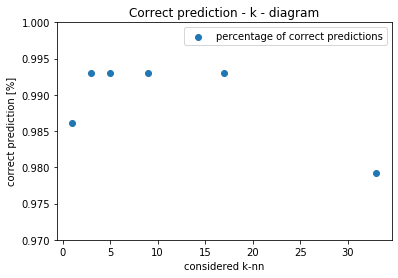

In [328]:
fig = plt.figure()

plt.title("Correct prediction - k - diagram")
plt.scatter(ks, correct_rate, label='percentage of correct predictions')
plt.ylabel("correct prediction [%]")
plt.xlabel("considered k-nn")
plt.ylim([0.97, 1.])
plt.legend()
plt.show()

<span style="color:green;font-weight:bold"> Your solution is different to the sample solution. You should provide the classification error instead of the accuracy/score. Also, the legend is not really neccessary and adds a point to the diagram. If you don't watch closely, you overlook that it is just the legend. You also split up the data set in only 3s and 9s and used this subset in order to apply your algorithms. You could put more effort into your plots. </span>

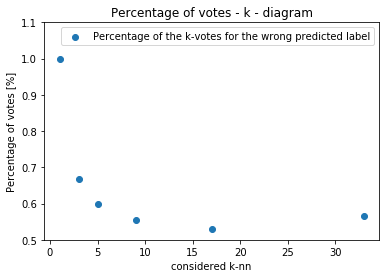

In [329]:
fig = plt.figure()

plt.title("Percentage of votes - k - diagram")
plt.scatter(ks, error_rate_votes, label='Percentage of the k-votes for the wrong predicted label')
plt.ylabel("Percentage of votes [%]")
plt.xlabel("considered k-nn")
plt.ylim([0.5, 1.1])
plt.legend()
plt.show()

The classification performance depends highly on k. For low k (k=1) and higher k (k=33) there is a drop in the performance. For k=3,5,6,17 the performance remains constant at around 99.4%. Reason for this is that for low k (k=1) just the nearest neighbour votes for the classification. So test images at the border of the number 9-train-cluster could have a representation of number 3-train cluster as nearest neighbour and would therefore misclassified. For high k (k=33) too many neighbours of the wrong cluster are also considered and leads to a missclassification.   
In the other diagramm the percentage of votes for a wrong class in case the test image was missclassified was displayed. The closer the percentage of votes is to 50%, the less sure the classifier's prediction about the missclassified test image is. Here a minimum at k = 17 is shown.
Combine both observation I would suggest to use a k of 17.

## Cross-validation

In [330]:
def split_folds(data: np.array, target: np.array, L: int) -> [np.array, np.array]:
    """
        Splits the data evenly into L folds.
    
        params
        ______
        data : np.array
            NxD matrix, which contains every flattened image
        target : np.array
            Nx1 matrix, which contains every label of each image
        L : integer
            number of folds
            
        returns
        _______
        data_split : np.array
            LxMxD matrix, in which the data is stored splitted in L sized subsets.
        target_split: np.array
            LxM matrix with the predicted labels of the test sample.
    """
    
    assert len(data.shape) == 2, "data-array should be of dim. 2"
    assert len(target.shape) == 1, "target-array should be of dim. 1"
    assert data.shape[0] == target.shape[0], "the data should have the same Dim. than its target"
    
    # Concatenate the data and the target to one array and permutate it
    all_data_shuffled = np.random.permutation(np.concatenate((data,target[:,None]), axis=1))
    # Reduce the size, such that the data can be split in evenly sized folds
    orig_len, orig_width = data.shape
    all_data_shuffled = all_data_shuffled[:(orig_len - orig_len%L),:]
    
    #Split the array into data and target and into its folds
    data, target = np.array_split(all_data_shuffled, [orig_width], axis=1)
    
    data_split = np.array(np.array_split(data, L, axis=0))
    target_split = np.array(np.array_split(np.squeeze(target), L, axis=0))
    
    return data_split, target_split   

In [331]:
def correct_rate_knn_classifier(k: int,
                                 train: np.array,
                                 train_label: np.array,
                                 test: np.array,
                                 test_label: np.array
                                ) -> float:
    """
        Calculates the knn-classification prediction rate.
    
        params
        ______
        k : integer
            considered k-nn
        train : np.array
            NxD matrix, which contains every flattened train image
        train_label : np.array
            Nx1 matrix, which contains every label of each train image
        test : np.array
            MxD matrix, which contains every flattened test image
        test_label : np.array
            Mx1 matrix, which contains every label of each test image
            
        returns
        _______
        correct_rate : float
            rate of the corrrect prediction of the knn-classification
    """
    
    assert len(train.shape) == 2, "train-array should be of dim. 2"
    assert len(train_label.shape) == 1, "train_label-array should be of dim. 1"
    assert train.shape[0] == train_label.shape[0], "the train data should have the same Dim. than its labels"
    assert len(test.shape) == 2, "test-array should be of dim. 2"
    assert len(test_label.shape) == 1, "test_label-array should be of dim. 1"
    assert test.shape[0] == test_label.shape[0], "the test data should have the same Dim. than its labels"
    
    pred_labels, _ = knn_classifier(k, train, train_label, test)
    
    pred_correct = np.equal(pred_labels, test_label)
    
    correct_rate = pred_correct.sum() / pred_labels.shape[0]
    
    return correct_rate

def correct_rate_sklearn_knn_classifier(k: int,
                                         train: np.array,
                                         train_label: np.array,
                                         test: np.array,
                                         test_label: np.array
                                        ) -> float:
    """
        Calculates the knn-classification prediction rate using the sklearn-method.
    
        params
        ______
        k : integer
            considered k-nn
        train : np.array
            NxD matrix, which contains every flattened train image
        train_label : np.array
            Nx1 matrix, which contains every label of each train image
        test : np.array
            MxD matrix, which contains every flattened test image
        test_label : np.array
            Mx1 matrix, which contains every label of each test image
            
        returns
        _______
        correct_rate : float
            rate of the corrrect prediction of the knn-classification
    """
    
    assert len(train.shape) == 2, "train-array should be of dim. 2"
    assert len(train_label.shape) == 1, "train_label-array should be of dim. 1"
    assert train.shape[0] == train_label.shape[0], "the train data should have the same Dim. than its labels"
    assert len(test.shape) == 2, "test-array should be of dim. 2"
    assert len(test_label.shape) == 1, "test_label-array should be of dim. 1"
    assert test.shape[0] == test_label.shape[0], "the test data should have the same Dim. than its labels"
    
    from sklearn.neighbors import KNeighborsClassifier
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train, train_label)
    
    pred_labels = neigh.predict(test)
    
    pred_correct = np.equal(pred_labels, test_label)
    
    correct_rate = pred_correct.sum() / pred_labels.shape[0]
    
    return correct_rate

In [332]:
ks = np.array([1, 5, 17])
Ls = np.array([2,5,10])

correct_array = np.empty((ks.shape[0],Ls.shape[0],2))
correct_array_sklearn = np.empty((ks.shape[0],Ls.shape[0],2))

for i,k in enumerate(ks):
    for j,L in enumerate(Ls):
        
        correct_temp0 = np.empty(L)
        correct_temp1 = np.empty(L)
        
        data_split, target_split = split_folds(data, target, L)
        
        for ind in range(L):
            data_train = np.reshape(np.delete(data_split, ind, axis=0), (-1, data_split.shape[2]))
            label_train = np.reshape(np.delete(target_split, ind, axis=0), (-1))
            data_test = data_split[ind]
            label_test = target_split[ind]
            
            correct_temp0[ind] = correct_rate_knn_classifier(k, data_train, label_train,
                                                            data_test, label_test)
            correct_temp1[ind] = correct_rate_sklearn_knn_classifier(k, data_train, label_train,
                                                data_test, label_test)

        correct_array[i,j,0] = correct_temp0.mean()
        correct_array[i,j,1] = correct_temp0.std()
        correct_array_sklearn[i,j,0] = correct_temp1.mean()
        correct_array_sklearn[i,j,1] = correct_temp1.std()

<function matplotlib.pyplot.show(*args, **kw)>

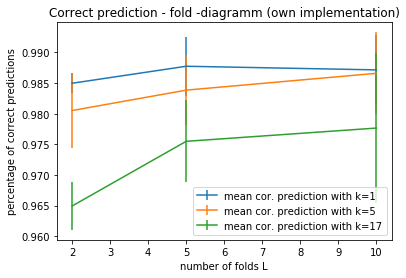

In [333]:
fig = plt.figure()
plt.title("Correct prediction - fold -diagramm (own implementation)");
plt.errorbar(Ls, correct_array[0,:,0], yerr=correct_array[0,:,1], label=f"mean cor. prediction with k={ks[0]}")
plt.errorbar(Ls, correct_array[1,:,0], yerr=correct_array[1,:,1], label=f"mean cor. prediction with k={ks[1]}")
plt.errorbar(Ls, correct_array[2,:,0], yerr=correct_array[2,:,1], label=f"mean cor. prediction with k={ks[2]}")
plt.xlabel("number of folds L")
plt.ylabel("percentage of correct predictions")
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

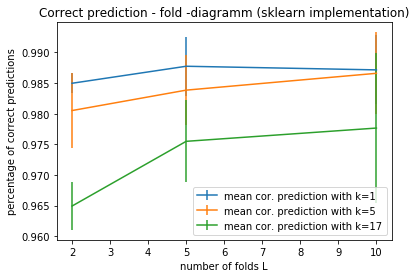

In [334]:
fig = plt.figure()
plt.title("Correct prediction - fold -diagramm (sklearn implementation)");
plt.errorbar(Ls, correct_array_sklearn[0,:,0], yerr=correct_array_sklearn[0,:,1], label=f"mean cor. prediction with k={ks[0]}")
plt.errorbar(Ls, correct_array_sklearn[1,:,0], yerr=correct_array_sklearn[1,:,1], label=f"mean cor. prediction with k={ks[1]}")
plt.errorbar(Ls, correct_array_sklearn[2,:,0], yerr=correct_array_sklearn[2,:,1], label=f"mean cor. prediction with k={ks[2]}")
plt.xlabel("number of folds L")
plt.ylabel("percentage of correct predictions")
plt.legend()
plt.show

The first observation is, that results of the own implemented knn-classifier is the same as the sklearn-implemented knn-classifier. The second observation is, that the higher the number of training images (which means L is high) is, the higher the prediction accuracy, but also the accuracy varies more strongly (higher std). The third observation is, that suprisingly the accuracy is for low k higher than for high k.   

<span style="color:green;font-weight:bold"> Your solution is different to the sample solution. You used multiple functions (as well as defining the function split_folds), which was explicitly asked on the sheet. In the sample solution, there exists only one function called cross-validate, which puts everything in one function. As it was explicitly mentioned to define multiple functions, I would prefer your way. As for the presentation of your results, you should put in more effort. Using straight lines to connect data points suggests, that you interpolated between them, which is of course not the case. You implemented the sklearn algorithm nearly identical to the sample solution. Your own implementation of a knn algorithm is indeed different. Your solution is much more sophisticated in terms of what type of data you can plug into the function and error messages if something is not quite right. Again, it was asked to present the error rates and not the accuracy. All in all, well done. </span>